<a href="https://colab.research.google.com/github/StalinSagolsem/testing/blob/main/urbanSound.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np

In [ ]:
import librosa
audio_file_path = 'jackhammer.wav'
librosa_audio_data, librosa_sample_rate = librosa.load(audio_file_path)

In [ ]:
print(f'Audio sample rate - {librosa_sample_rate}')
print(f'Audio data = {librosa_audio_data}')

Audio sample rate - 22050
Audio data = [-0.00192817  0.05057957  0.04793097 ... -0.02291171 -0.00827701
  0.00335778]


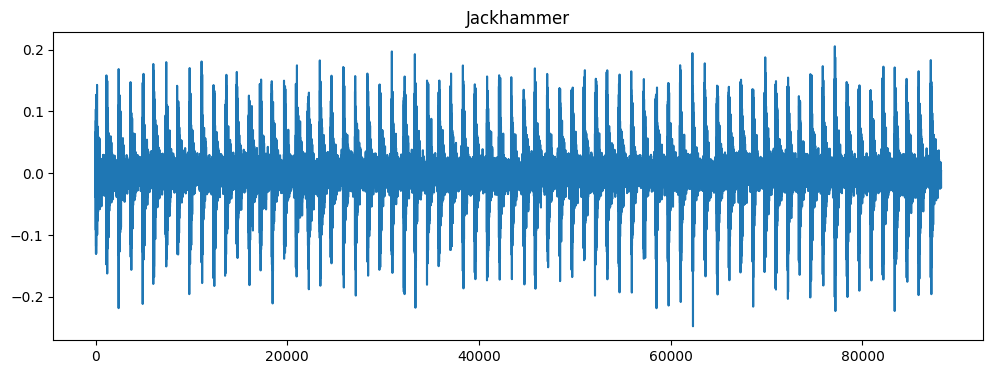

In [ ]:
### Lets plot the librosa audio data
import matplotlib.pyplot as plt
# Original audio wth 1 channe (mono)
plt.figure(figsize=(12,4))
plt.plot(librosa_audio_data)
plt.title('Jackhammer')
plt.show()

In [ ]:
mfccs = librosa.feature.mfcc(y=librosa_audio_data, sr=librosa_sample_rate, n_mfcc=40)
print(mfccs.shape)

(40, 173)


In [ ]:
mfccs

array([[-1.5166855e+02, -1.5969398e+02, -1.3949283e+02, ...,
        -1.3840915e+02, -1.4859525e+02, -2.4023927e+02],
       [ 2.3215538e+01,  3.6936180e+01,  2.8216600e+01, ...,
         2.4105724e+01,  2.9344402e+01,  5.2480888e+01],
       [-2.3933357e+01, -1.9633915e+01, -2.4126808e+01, ...,
        -2.8739326e+01, -2.8307724e+01, -8.2448864e+00],
       ...,
       [ 3.1384271e-01, -7.5033590e-02,  6.8927419e-01, ...,
        -4.6240149e+00, -4.2368116e+00, -4.7935610e+00],
       [ 1.3206015e+01,  1.0395797e+01,  8.8783264e+00, ...,
         1.8757318e+00,  4.7817802e+00,  1.3543582e-01],
       [ 1.1932292e+01,  9.7559280e+00,  8.7192726e+00, ...,
         5.4092560e+00,  5.0465984e+00, -2.8835642e+00]], dtype=float32)

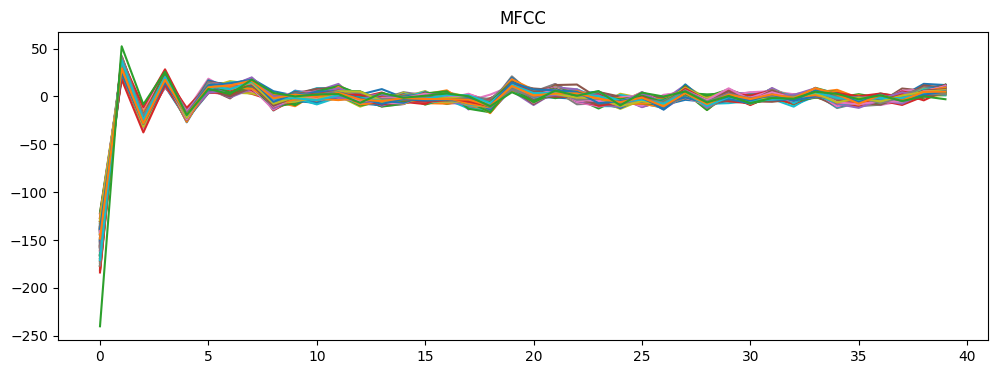

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(mfccs)
plt.title('MFCC')
plt.show()

In [ ]:
mfccs_scaled_features = np.mean(mfccs.T, axis=0)

In [ ]:
mfccs_scaled_features

array([-1.5110661e+02,  3.0414120e+01, -2.3471029e+01,  1.8288168e+01,
       -1.9842155e+01,  1.0555738e+01,  6.9013729e+00,  1.4088159e+01,
       -6.0533266e+00, -1.4469270e-01, -2.5931673e-02,  4.0304108e+00,
       -2.5575929e+00, -3.4664013e+00, -2.4647820e+00, -1.2096426e+00,
       -8.3327585e-01, -4.9751787e+00, -9.2334948e+00,  1.1697457e+01,
        5.7334846e-01,  6.5411568e+00, -1.5014391e-01, -3.0423305e+00,
       -6.3225832e+00, -1.8697790e+00, -7.3336315e+00,  4.9282165e+00,
       -5.9210453e+00,  1.3338957e+00, -2.6917760e+00,  2.1507721e+00,
       -3.2300708e+00,  4.0973654e+00, -2.3114126e+00, -4.2702847e+00,
       -2.5614221e+00, -1.4256219e+00,  4.0271730e+00,  7.0291486e+00],
      dtype=float32)

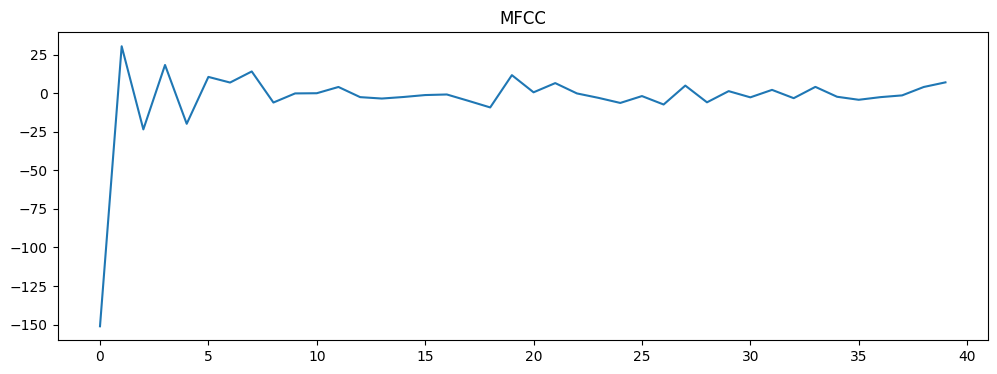

In [ ]:
plt.figure(figsize=(12,4))
plt.plot(mfccs_scaled_features)
plt.title('MFCC')
plt.show()

In [ ]:
# def features_extractor(file):
#     audio, sample_rate = librosa.load(file_name)
#     mfccs_features = librosa.feature.mfcc(y=audio, sr= sample_rate, n_mfcc=40)
#     mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
#     return mfccs_scaled_features
def features_extractor(file):
    try:
        audio, sample_rate = librosa.load(file)
        mfccs_features = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=40)
        mfccs_scaled_features = np.mean(mfccs_features.T, axis=0)
        return mfccs_scaled_features
    except Exception as e:
        print(f"Error processing {file}: {e}")
        return None

In [ ]:
from tqdm import tqdm
import os
import pandas as pd

In [ ]:
# Initialize an empty list to store features and class labels
extracted_features = []

root_dir = "C:\\Users\\sagol\\Desktop\\6_class_UrbanSound"
wav_folder = os.path.join(root_dir, "wav_file")

In [ ]:
# Print the wav_folder path to verify its correctness
print(f"wav_folder: {wav_folder}")

if not os.path.exists(wav_folder):
    raise FileNotFoundError(f"The directory {wav_folder} does not exist")

wav_folder: C:\Users\sagol\Desktop\6_class_UrbanSound\wav_file


In [ ]:
# Iterate over each class folder in wav_folder
for class_folder in os.listdir(wav_folder):
    class_folder_path = os.path.join(wav_folder, class_folder)
    if not os.path.isdir(class_folder_path):
        continue

    # Iterate over each file in the class folder
    for file_name in tqdm(os.listdir(class_folder_path)):
        if file_name.endswith(".wav"):
            file_path = os.path.join(class_folder_path, file_name)
            if not os.path.exists(file_path):
                print(f"File not found: {file_path}")
                continue
            mfcc_features = features_extractor(file_path)
            if mfcc_features is not None:
                extracted_features.append([mfcc_features, class_folder])

100%|████████████████████████████████████████████████████████████████████████████████| 400/400 [00:06<00:00, 63.93it/s]


In [ ]:
# Convert the list of extracted features to a Pandas DataFrame
extracted_features_df = pd.DataFrame(extracted_features, columns=['feature', 'class'])
print(extracted_features_df.head())

                                             feature             class
0  [-171.67918, 108.22299, -40.386963, 2.3602536,...  children_playing
1  [-183.29903, 107.934296, -45.00611, -5.854226,...  children_playing
2  [-184.96565, 116.864784, -29.12984, -0.4692447...  children_playing
3  [-193.5383, 118.8601, -41.03923, -4.657423, -5...  children_playing
4  [-178.81297, 100.77496, -36.476566, 5.5743, -7...  children_playing


In [ ]:
# Shuffle the DataFrame multiple times
num_shuffles = 5  # Define the number of times you want to shuffle
shuffled_df = extracted_features_df.copy()

for _ in range(num_shuffles):
    shuffled_df = shuffled_df.sample(frac=1).reset_index(drop=True)

# Display the shuffled DataFrame
print(shuffled_df.head())


                                             feature             class
0  [-322.98126, 119.88938, -13.55684, 15.033861, ...  children_playing
1  [-55.806427, -14.648311, -31.20869, -22.071983...          drilling
2  [-18.19855, 52.64851, -12.562718, 13.417365, -...        jackhammer
3  [-163.08171, 149.68214, -4.4285417, -10.934365...       dog_barking
4  [-29.254112, -4.3770256, -15.281776, 15.309009...          drilling


In [ ]:
### Split the dataset into independent and dependent dataset
X=np.array(shuffled_df['feature'].tolist())
y=np.array(shuffled_df['class'].tolist())

In [ ]:
X.shape

(2400, 40)

In [ ]:
y=np.array(pd.get_dummies(y))

In [ ]:
y.shape

(2400, 6)

In [ ]:
### Train Test Split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [ ]:
X_train

array([[-8.6415237e+01,  1.4264349e+02, -1.2019263e+02, ...,
        -6.8979961e-01,  1.1019301e+00, -1.8499374e+00],
       [-1.7829396e+02,  1.2995090e+02, -1.3448246e+01, ...,
        -1.5161794e+00, -3.2629910e+00,  1.4245670e+00],
       [-1.7933574e+02,  1.2461027e+02, -5.9971680e+01, ...,
         4.3784590e+00, -2.3884773e+00,  3.0189011e+00],
       ...,
       [-3.2617566e+02,  1.1602547e+02,  6.0921341e-01, ...,
        -1.8024383e-01, -3.3444951e+00,  1.3953449e+00],
       [-2.2199200e+02,  1.5377145e+02, -7.2345497e+01, ...,
         5.5398297e+00,  9.8394001e-01, -1.8527664e+00],
       [-4.2167007e+02,  8.3544563e+01,  2.0915751e+01, ...,
         9.5008612e-01,  1.1165861e+00,  1.6920595e+00]], dtype=float32)

In [ ]:
y

array([[1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0, 0],
       ...,
       [0, 0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0, 0]], dtype=uint8)

In [ ]:
X_train.shape

(1920, 40)

In [ ]:
X_test.shape

(480, 40)

In [ ]:
y_train.shape

(1920, 6)

In [ ]:
y_test.shape

(480, 6)

In [ ]:
import tensorflow as tf
print(tf.__version__)


2.15.0


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics
import tensorflow as tf

In [ ]:
### No of classes
num_labels=y.shape[1]
print(num_labels)

6


In [ ]:
model=Sequential()
###first layer
model.add(Dense(100,input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###second layer
model.add(Dense(200))
model.add(Activation('relu'))
model.add(Dropout(0.5))
###third layer
model.add(Dense(100))
model.add(Activation('relu'))
model.add(Dropout(0.5))

###final layer
model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               4100      
                                                                 
 activation (Activation)     (None, 100)               0         
                                                                 
 dropout (Dropout)           (None, 100)               0         
                                                                 
 dense_1 (Dense)             (None, 200)               20200     
                                                                 
 activation_1 (Activation)   (None, 200)               0         
                                                                 
 dropout_1 (Dropout)         (None, 200)               0         
                                                                 
 dense_2 (Dense)             (None, 100)               2

In [ ]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
# ## Trianing my model

from tensorflow.keras.callbacks import ModelCheckpoint
from datetime import datetime

num_epochs = 500
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath= 'MyBestModel.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

start = datetime.now()

training_hist = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)
model.save("final_model.h5")


Epoch 1/500
54/60 [==========================>...] - ETA: 0s - loss: 0.3348 - accuracy: 0.8825
Epoch 1: val_accuracy improved from -inf to 0.87500, saving model to MyBestModel.h5
60/60 [==============================] - 0s 5ms/step - loss: 0.3352 - accuracy: 0.8823 - val_loss: 0.4822 - val_accuracy: 0.8750
Epoch 2/500
43/60 [====================>.........] - ETA: 0s - loss: 0.3457 - accuracy: 0.8881
Epoch 2: val_accuracy did not improve from 0.87500
60/60 [==============================] - 0s 3ms/step - loss: 0.3419 - accuracy: 0.8885 - val_loss: 0.4719 - val_accuracy: 0.8708
Epoch 3/500
47/60 [======================>.......] - ETA: 0s - loss: 0.3517 - accuracy: 0.8743
Epoch 3: val_accuracy did not improve from 0.87500
60/60 [==============================] - 0s 3ms/step - loss: 0.3438 - accuracy: 0.8833 - val_loss: 0.4635 - val_accuracy: 0.8750
Epoch 4/500
60/60 [==============================] - ETA: 0s - loss: 0.3517 - accuracy: 0.8781
Epoch 4: val_accuracy did not improve from 0.87

In [ ]:
# ## Trianing my model

num_epochs = 500
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath= 'MyBestModel_v2.h5', monitor='val_accuracy', verbose=1, save_best_only=True, mode='auto')

start = datetime.now()

training_hist = model.fit(X_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(X_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)
model.save("final_model_v2.h5")


Epoch 1/500
56/60 [===========================>..] - ETA: 0s - loss: 0.2938 - accuracy: 0.9085
Epoch 1: val_accuracy improved from -inf to 0.86875, saving model to MyBestModel_v2.h5
60/60 [==============================] - 0s 5ms/step - loss: 0.2902 - accuracy: 0.9099 - val_loss: 0.5062 - val_accuracy: 0.8687
Epoch 2/500
36/60 [=================>............] - ETA: 0s - loss: 0.2686 - accuracy: 0.9097
Epoch 2: val_accuracy did not improve from 0.86875
60/60 [==============================] - 0s 3ms/step - loss: 0.2596 - accuracy: 0.9115 - val_loss: 0.4780 - val_accuracy: 0.8604
Epoch 3/500
46/60 [======================>.......] - ETA: 0s - loss: 0.2794 - accuracy: 0.9042
Epoch 3: val_accuracy did not improve from 0.86875
60/60 [==============================] - 0s 3ms/step - loss: 0.2731 - accuracy: 0.9073 - val_loss: 0.4778 - val_accuracy: 0.8687
Epoch 4/500
45/60 [=====================>........] - ETA: 0s - loss: 0.3099 - accuracy: 0.8958
Epoch 4: val_accuracy improved from 0.86875 

[]

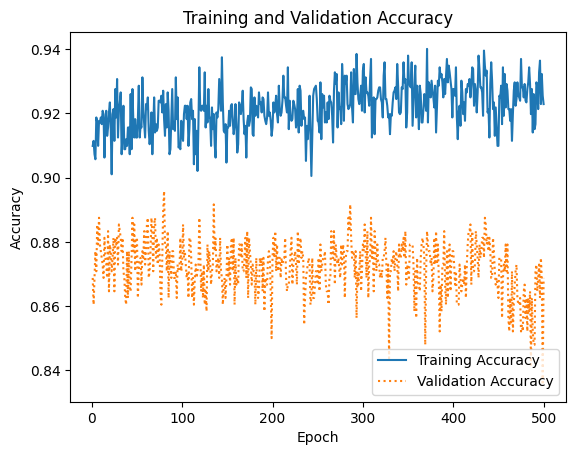

In [ ]:
acc = training_hist.history['accuracy']
val_acc = training_hist.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, '-', label='Training Accuracy')
plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.plot()